In [1]:
from cavity_beam_profiler import *
from tools import plot_2D_contour
import matplotlib.pyplot as plt

## Initialize the cavity_profiler class

In [2]:
CF = cavity_profiler('../input/input.yaml')

In [3]:
# screens from records
CF.screens

{'x11': 16.000028294,
 'x10': 16.144218294,
 'x21': 16.650028294000002,
 'x23': 18.534196294,
 'x24': 34.677886294000004,
 'x31': 48.750465293999994,
 'x41': 49.400654882,
 'x42': 49.556554469999995}

## 
One roundtrip from the undulator center

In [4]:
CF.recirculate()
# beam at screens
CF.record

{'x11': <wavefront.GaussianWavefront at 0x15b22ae1880>,
 'x10': <wavefront.GaussianWavefront at 0x15b22ae18b0>,
 'x21': <wavefront.GaussianWavefront at 0x15b22ae1820>,
 'x23': <wavefront.GaussianWavefront at 0x15b22ae1e80>,
 'x24': <wavefront.GaussianWavefront at 0x15b22ae1f10>,
 'x31': <wavefront.GaussianWavefront at 0x15b1e535c40>,
 'x41': <wavefront.GaussianWavefront at 0x15b1e5354f0>,
 'x42': <wavefront.GaussianWavefront at 0x15b1e5354c0>}

## Get beam profile at certain screen

Profile at screen x24


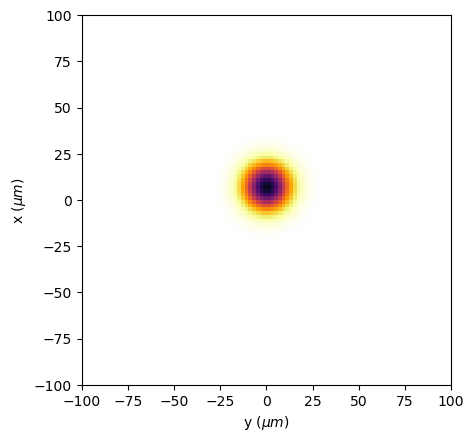

Profile at screen x42


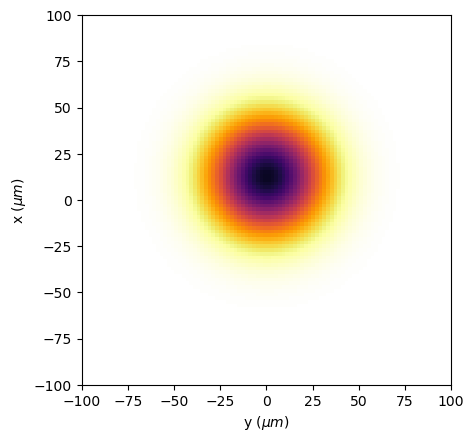

In [5]:
x, y, p = CF.get_profile('x24')
print('Profile at screen x24')
plot_2D_contour(x, y, np.abs(p)**2)

x, y, p = CF.get_profile('x42')
print('Profile at screen x42')
plot_2D_contour(x, y, np.abs(p)**2)

# Get Diode E signal

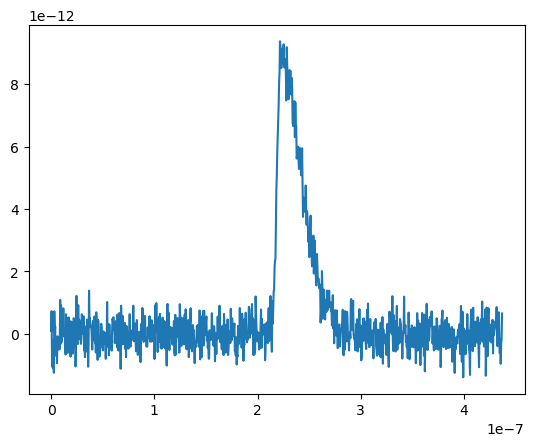

In [6]:
t, sig = CF.get_diodeE_signal()
plt.plot(t, sig)

##  Multiple roundtrips 

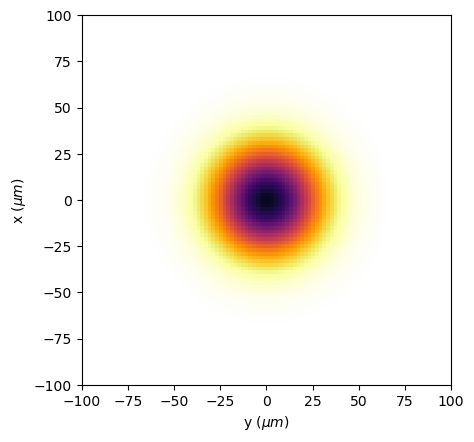

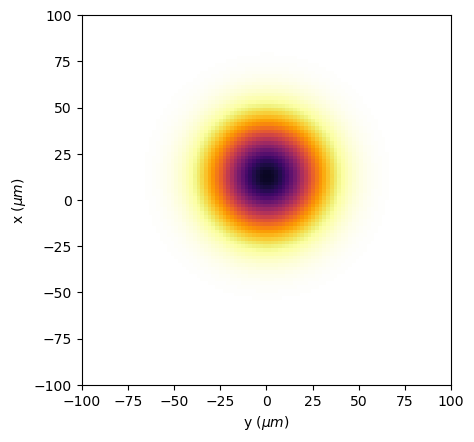

In [7]:
for _ in range(2):
    CF.recirculate()
    x = CF.beam.x
    y = CF.beam.y
    p = CF.beam.get_field()
    plot_2D_contour(x, y, np.abs(p)**2)
for _ in range(28):
    CF.recirculate()

Profile at screen x24


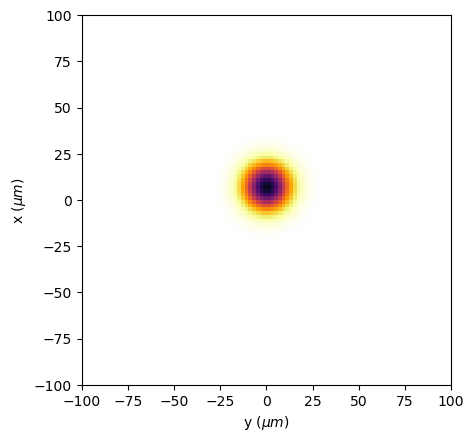

In [8]:
x, y, p = CF.get_profile('x24')
print('Profile at screen x24')
plot_2D_contour(x, y, np.abs(p)**2)

# Show Diode signal

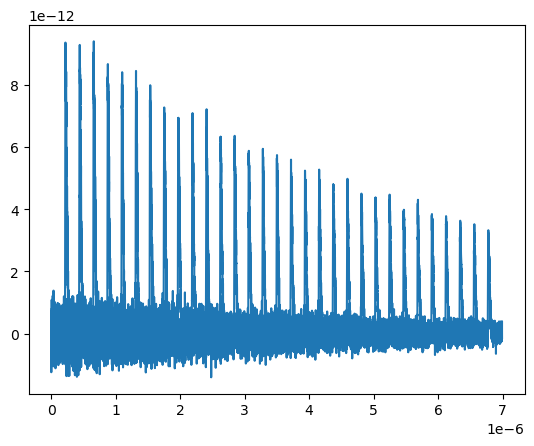

In [9]:
t, sig = CF.get_diodeE_signal()
plt.plot(t, sig)

# Reset

In [10]:
CF.reset()

# Include displacement of diode

In [11]:
for _ in range(30):
    CF.recirculate(dx_diodeE = 80e-6)

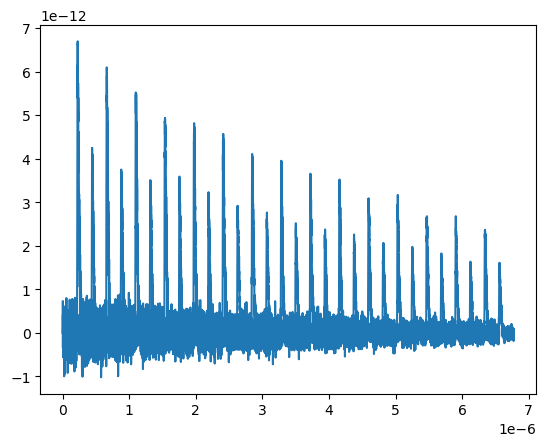

In [12]:
t2, sig2 = CF.get_diodeE_signal()
plt.plot(t2, sig2)

## Include mirror misalignment error

In [13]:
CF = cavity_profiler('../input/input.yaml')
CF.recirculate(dtheta1_x= 800e-9, dtheta2_y = 500e-9)

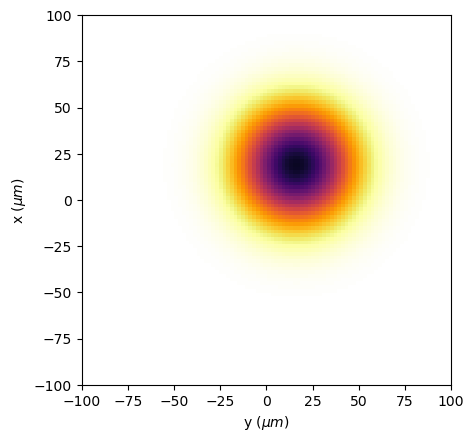

In [9]:
x, y, p = CF.get_profile('x41')
plot_2D_contour(x, y, np.abs(p)**2)

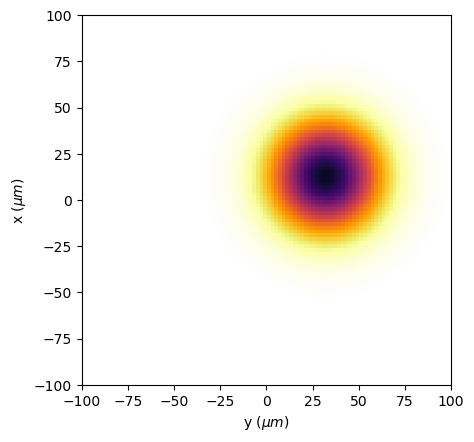

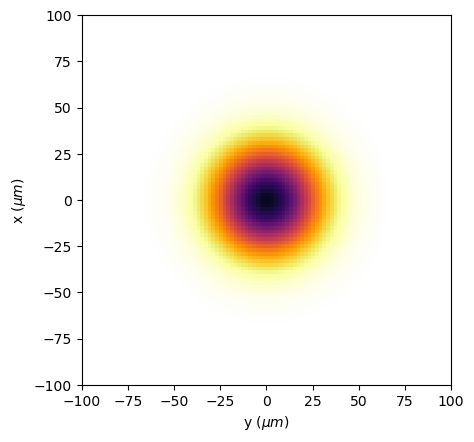

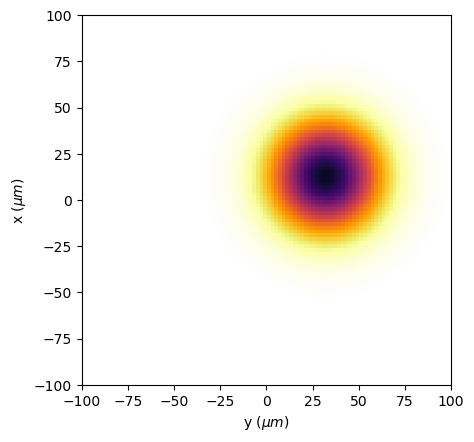

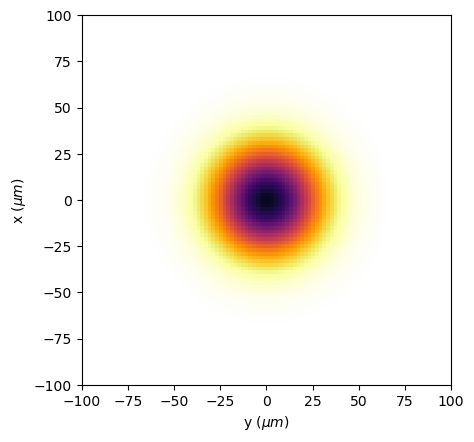

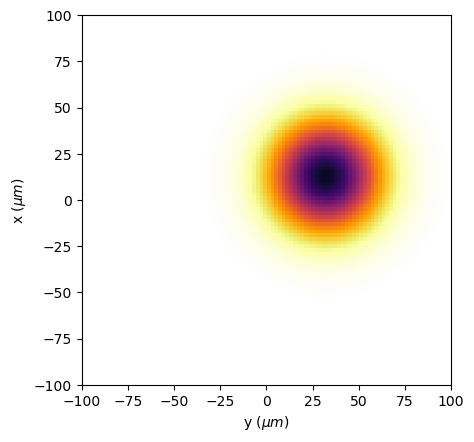

In [14]:
CF = cavity_profiler('../input/input.yaml')
for _ in range(5):
    CF.recirculate(dtheta1_y= 2000e-9)
    x = CF.beam.x
    y = CF.beam.y
    p = CF.beam.get_field()
    plot_2D_contour(x, y, np.abs(p)**2)

## Lens displacement error

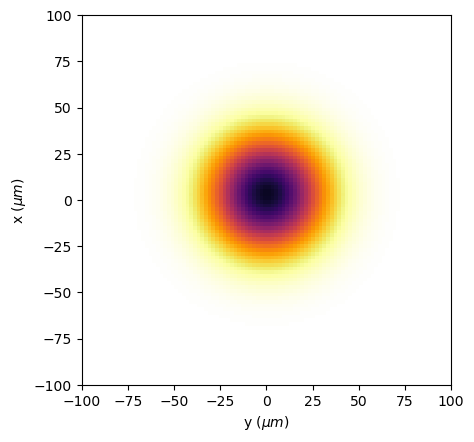

In [15]:
CF = cavity_profiler('../input/input.yaml')
CF.recirculate(dx_CRL1 = 5e-6)
x, y, p = CF.get_profile('x41')
plot_2D_contour(x, y, np.abs(p)**2)